## Insight project: part 3
### Logistic regression

In [16]:
#apply logistic regression on training data
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score, GridSearchCV

In [17]:
#read data, apply 80:20 split for train vs validation
data = pd.read_csv('data/train.csv', index_col=False)
data = data.sample(frac=1, random_state=6)
train = data[:int(len(data) * 0.8)]
val = data[int(len(data) * 0.8):]
print(train.shape)
print(val.shape)
#print(train.head())
print(val.head())

(566, 4098)
(142, 4098)
              Unnamed: 0  hits    0    1    2    3    4    5    6    7  ...   \
97        Benazepril HCl     0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...    
18             Cortisone     0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    
102  Nomifensine maleate     0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    
456            Minoxidil     0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...    
541             Levodopa     0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    

     4086  4087  4088  4089  4090  4091  4092  4093  4094  4095  
97    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
18    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
102   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
456   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
541   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 4098 columns]


In [18]:
# #test logistic regression model by change regression stress
# rs = np.arange(0.2, 10, 0.5)
# val_accuracy = []
# val_precision = []
# val_recall = []
# val_f1 = []
# auc_scores = []
# for i in rs:  
#     lr = LogisticRegression(penalty='l1', C=i, tol=0.01, class_weight={1:1, 0:1})
#     lr.fit(train.iloc[:, 2:].values, train.iloc[:, 1].values)    
#     val_accuracy.append(lr.score(val.iloc[:, 2:].values, val.iloc[:, 1].values))
#     val_pred = lr.predict(val.iloc[:, 2:].values)    
#     val_precision.append(precision_score(val.iloc[:, 1].values, val_pred))
#     val_recall.append(recall_score(val.iloc[:, 1].values, val_pred))
#     val_f1.append(f1_score(val.iloc[:, 1].values, val_pred))
#     val_pred_proba = lr.predict_proba(val.iloc[:, 2:].values)
#     auc_scores.append(roc_auc_score(val.iloc[:, 1].values, val_pred_proba[:, 1]))

# plt.subplots_adjust(left=0.1, bottom=0.1, right=1.5, top=2, wspace=0.3, hspace=0.3)
# plt.subplot(231)
# plt.title('accuracy')
# plt.ylabel('score')
# plt.xlabel('regression stress')
# plt.scatter(rs, val_accuracy)
# plt.subplot(232)
# plt.title('precision')
# plt.xlabel('regression stress')
# plt.scatter(rs, val_precision)
# plt.subplot(233)
# plt.title('recall')
# plt.ylabel('score')
# plt.xlabel('regression stress')
# plt.scatter(rs, val_recall)
# plt.subplot(234)
# plt.title('f1_score')
# plt.xlabel('regression stress')
# plt.scatter(rs, val_f1)
# plt.subplot(235)
# plt.title('auc_score')
# plt.xlabel('regression stress')
# plt.scatter(rs, auc_scores)

In [19]:
# #test logistic regression model by change weights
# weight = np.arange(0.1, 5, 0.1)
# val_accuracy = []
# val_precision = []
# val_recall = []
# val_f1 = []
# auc_scores = []
# for w in weight:  
#     lr = LogisticRegression(penalty='l1', C=5, tol=0.01, class_weight={1:w, 0:1})
#     lr.fit(train.iloc[:, 2:].values, train.iloc[:, 1].values)    
#     val_accuracy.append(lr.score(val.iloc[:, 2:].values, val.iloc[:, 1].values))
#     val_pred = lr.predict(val.iloc[:, 2:].values)    
#     val_precision.append(precision_score(val.iloc[:, 1].values, val_pred))
#     val_recall.append(recall_score(val.iloc[:, 1].values, val_pred))
#     val_f1.append(f1_score(val.iloc[:, 1].values, val_pred))
#     val_pred_proba = lr.predict_proba(val.iloc[:, 2:].values)
#     auc_scores.append(roc_auc_score(val.iloc[:, 1].values, val_pred_proba[:, 1]))

# plt.subplots_adjust(left=0.1, bottom=0.1, right=1.5, top=2, wspace=0.3, hspace=0.3)
# plt.subplot(231)
# plt.title('accuracy')
# plt.ylabel('score')
# plt.xlabel('weight for positive samples')
# plt.scatter(weight, val_accuracy)
# plt.subplot(232)
# plt.title('precision')
# plt.xlabel('weight for positive samples')
# plt.scatter(weight, val_precision)
# plt.subplot(233)
# plt.title('recall')
# plt.ylabel('score')
# plt.xlabel('weight for positive samples')
# plt.scatter(weight, val_recall)
# plt.subplot(234)
# plt.title('f1_score')
# plt.xlabel('weight for positive samples')
# plt.scatter(weight, val_f1)
# plt.subplot(235)
# plt.title('auc_score')
# plt.xlabel('weight for positive samples')
# plt.scatter(weight, auc_scores)

auc_score: 0.6955796497080902


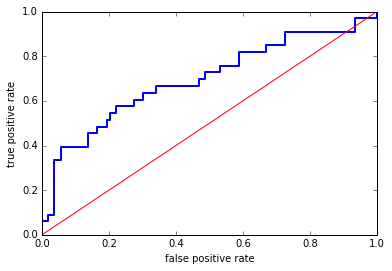

In [32]:
#roc curve
lr = LogisticRegression(penalty='l1', C=10, tol=0.01, class_weight={1:3, 0:1})
lr.fit(train.iloc[:, 2:].values, train.iloc[:, 1].values)
pred = lr.predict_proba(val.iloc[:, 2:].values)
auc_score = roc_auc_score(val.iloc[:, 1].values, pred[:, 1])
fpr, tpr, thresholds = roc_curve(val.iloc[:, 1].values, pred[:, 1])

print('auc_score: {}'.format(auc_score))

#plot auc curve
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.plot(fpr, tpr, c='b', linewidth=2)
plt.plot([0, 1], [0, 1], c='r', linewidth=1)

In [33]:
lr.coef_[lr.coef_ != 0].shape

(599,)

In [21]:
# #cross validation of train data
# #define the scorer
# auc_scorer = make_scorer(roc_auc_score)
# f1_scorer = make_scorer(f1_score)
# #select regression stress
# rs = np.arange(1, 10, 1)
# auc_score = []
# f1 = []
# for i in rs:
#     lr = LogisticRegression(penalty='l1', C=i, tol=0.01, class_weight={1:1, 0:1})
#     cv_score = cross_val_score(lr, data.iloc[:, 2:].values, data.iloc[:, 1].values, scoring=f1_scorer, cv=3, n_jobs=-1)
#     f1.append(np.mean(cv_score))
    
# plt.scatter(rs, f1)

auc_score: 0.6886294134000557


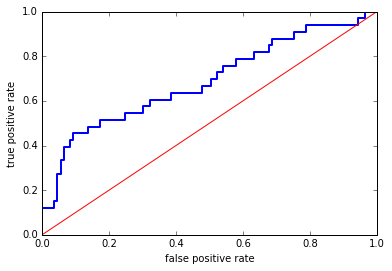

In [37]:
#lr after svd
svd = TruncatedSVD(n_components=200)
svd.fit(train.iloc[:, 2:].values)
new_train = svd.transform(train.iloc[:, 2:].values)
new_val = svd.transform(val.iloc[:, 2:].values)

lr = LogisticRegression(penalty='l2', C=1, tol=0.01, class_weight={1:3, 0:1})
lr.fit(new_train, train.iloc[:, 1].values)
pred = lr.predict_proba(new_val)
auc_score = roc_auc_score(val.iloc[:, 1].values, pred[:, 1])
fpr, tpr, thresholds = roc_curve(val.iloc[:, 1].values, pred[:, 1])

print('auc_score: {}'.format(auc_score))

#plot auc curve
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.plot(fpr, tpr, c='b', linewidth=2)
plt.plot([0, 1], [0, 1], c='r', linewidth=1)

In [38]:
lr.coef_[lr.coef_ != 0].shape

(100,)